<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2024/blob/main/notebooks/4_przestrzenne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install libspatialindex-dev ## specjalna biblioteka do analiz przestrzennych na linux
!pip install geopandas ## biblioteka geopandas w pythonie
!pip install folium mapclassify ## potrzebne do utworzenia mapy interaktywnej
## doinstalowujemy nowe pakiety na potrzeby analiz przestrzennych
!pip install -U pysal urbanaccess pandana libpysal esda

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium ## folium.Map
import libpysal as ps ## wagi
import esda ## statystyka morana
import mapclassify
from splot.esda import lisa_cluster ## wykres: kartogram ze skupiskami
from splot.esda import moran_scatterplot ## wykres: wykres rozrzutu ze statystyką morana
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8] ## wielkość wykresu

In [ ]:
pow_df = gpd.read_file(filename = "powiaty.shp", encoding = "utf-8")
pow_df = pow_df[["SP_ID", "jpt_kod_je", "jpt_nazwa_", "geometry"]]
pow_df.head(n = 2)

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37..."
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37..."


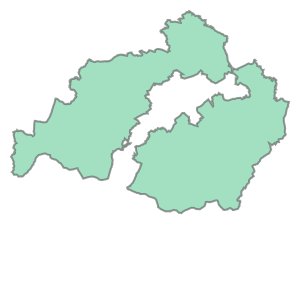

In [ ]:
pow_df['geometry'][2]

In [ ]:
pow_df.crs ##

In [ ]:
pow_df.set_crs(2180, inplace = True)

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37..."
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37..."
2,2,0206,powiat jeleniogórski,"POLYGON ((244044.051 332419.671, 244238.860 33..."
3,3,0204,powiat górowski,"POLYGON ((311163.070 427025.480, 311278.286 42..."
4,4,0214,powiat oleśnicki,"POLYGON ((377122.144 378970.426, 377400.754 37..."
...,...,...,...,...
375,375,3204,powiat goleniowski,"POLYGON ((196416.295 665923.035, 204197.772 66..."
376,376,3203,powiat drawski,"MULTIPOLYGON (((272711.282 614052.349, 272761...."
377,377,3205,powiat gryficki,"POLYGON ((231477.150 695592.611, 232078.418 69..."
378,378,3207,powiat kamieński,"POLYGON ((197510.247 682217.768, 197833.174 68..."


In [ ]:
pow_df.crs

<Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

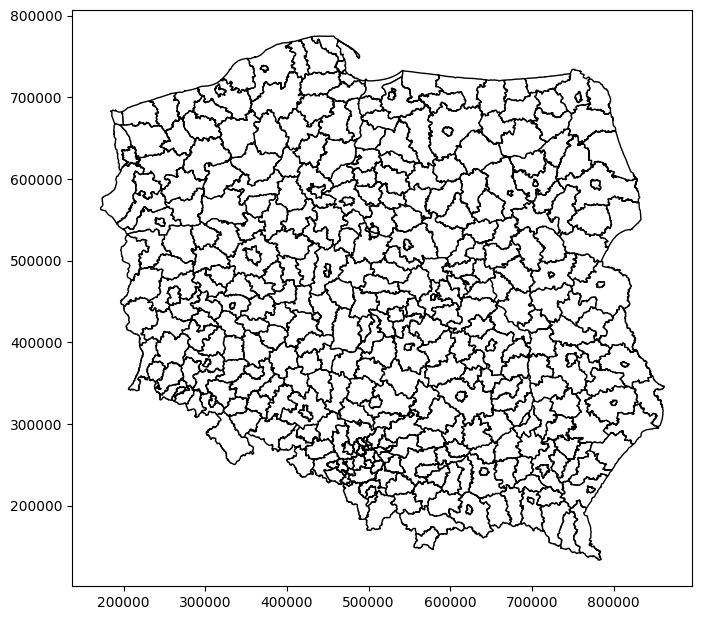

In [ ]:
pow_df.plot(color = "white", edgecolor = "black")

<Axes: >

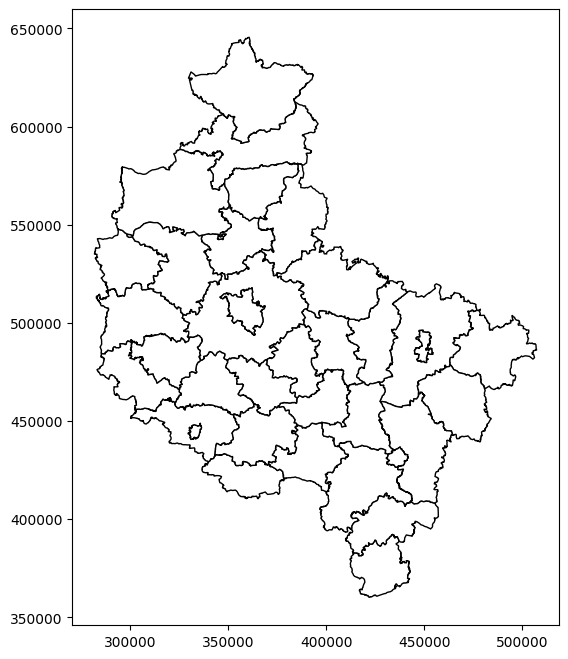

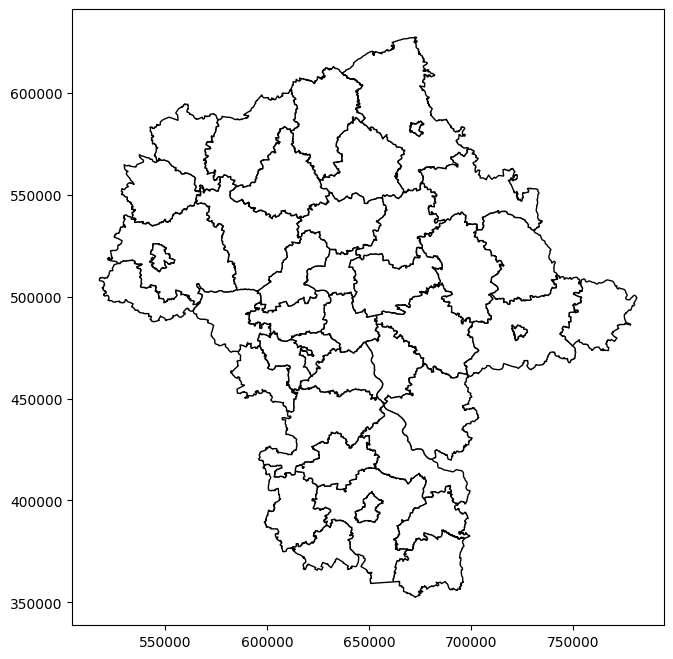

In [ ]:
pow_df[ pow_df.jpt_kod_je.str.slice(0,2) == "30" ].plot(color = "white", edgecolor = "black")
pow_df[ pow_df.jpt_kod_je.str.slice(0,2) == "14" ].plot(color = "white", edgecolor = "black")

In [ ]:
pow_df[pow_df.jpt_kod_je.str.slice(0,2) == "30"].explore()

In [ ]:
pzn_df = gpd.read_file(filename = "Poznan.shp", encoding = "utf-8")
pzn_df.head(n = 2)

,ID,dzielnica,latdeg,longdeg,geometry
0,1,DASZEWICE,52.313859,16.952755,"POLYGON ((16.953 52.314, 16.953 52.314, 16.953..."
1,2,GŁUSZYNA II,52.340461,16.966497,"POLYGON ((16.966 52.340, 16.969 52.340, 16.969..."


In [ ]:
pzn_df.crs

<Projected CRS: PROJCS["ETRS89_Poland_CS92",GEOGCS["GCS_ETRS89",DA ...>
Name: ETRS89_Poland_CS92
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European_Terrestrial_Reference_System_1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

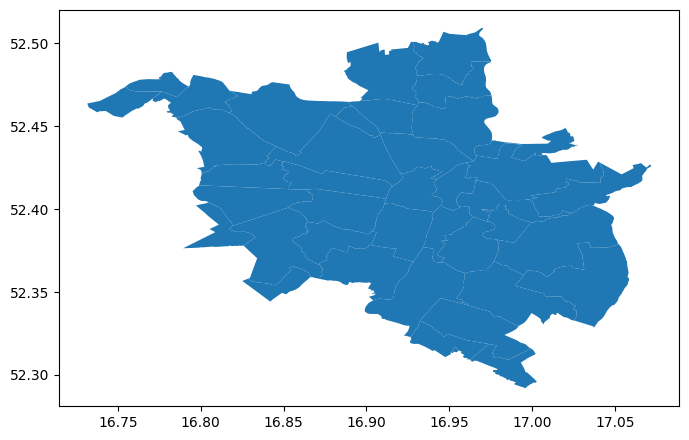

In [ ]:
pzn_df.plot()

In [ ]:
pow_df.crs.srs

'EPSG:2180'

In [ ]:
pzn_df.crs.srs

'PROJCS["ETRS89_Poland_CS92",GEOGCS["GCS_ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",19],PARAMETER["scale_factor",0.9993],PARAMETER["false_easting",500000],PARAMETER["false_northing",-5300000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [ ]:
pzn_df.set_crs(4326, allow_override=True, inplace=True)

,ID,dzielnica,latdeg,longdeg,geometry
0,1,DASZEWICE,52.313859,16.952755,"POLYGON ((16.95275 52.31386, 16.95268 52.31376..."
1,2,GŁUSZYNA II,52.340461,16.966497,"POLYGON ((16.96650 52.34046, 16.96876 52.33980..."
2,3,ŁAWICA II,52.414490,16.799036,"POLYGON ((16.79904 52.41449, 16.79907 52.41461..."
3,4,GŁUSZYNA,52.310071,16.963736,"POLYGON ((16.96374 52.31007, 16.96271 52.30911..."
4,5,ŁAWICA,52.414079,16.806510,"POLYGON ((16.80651 52.41408, 16.80883 52.41399..."
5,6,JUNIKOWO,52.378246,16.826269,"POLYGON ((16.82627 52.37825, 16.82690 52.37868..."
6,7,SPŁAWIE,52.342357,17.024640,"POLYGON ((17.02464 52.34236, 17.02432 52.34269..."
7,8,CHARTOWO,52.384196,16.969697,"POLYGON ((16.96970 52.38420, 16.96971 52.38421..."
8,9,STAROŁĘKA,52.353719,16.918065,"POLYGON ((16.91806 52.35372, 16.91840 52.35444..."
9,10,KRZESINY,52.330767,16.994084,"POLYGON ((16.99408 52.33077, 16.99403 52.33073..."


In [ ]:
pzn_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

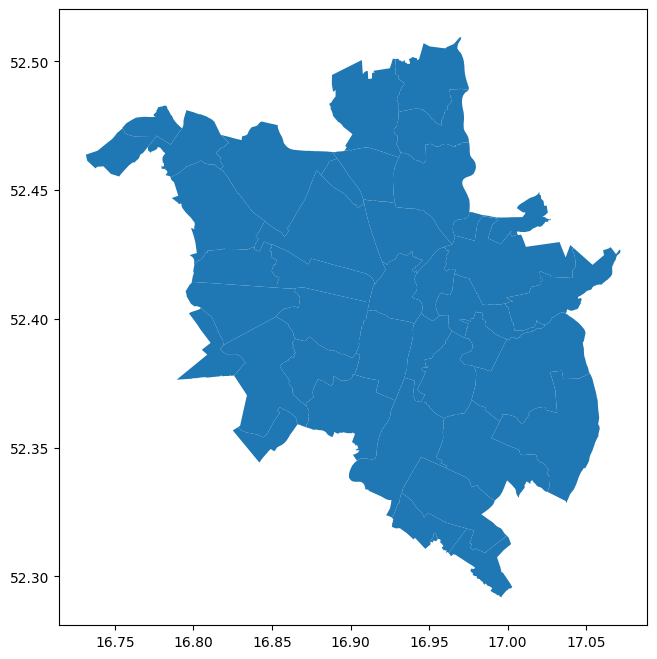

In [ ]:
pzn_df.plot()

In [ ]:
pzn_df.to_crs(2180, inplace = True)

In [ ]:
pzn_df.head()

,ID,dzielnica,latdeg,longdeg,geometry
0,1,DASZEWICE,52.313859,16.952755,"POLYGON ((360489.897 496180.764, 360484.472 49..."
1,2,GŁUSZYNA II,52.340461,16.966497,"POLYGON ((361509.368 499111.922, 361661.353 49..."
2,3,ŁAWICA II,52.414490,16.799036,"POLYGON ((350356.427 507675.900, 350359.501 50..."
3,4,GŁUSZYNA,52.310071,16.963736,"POLYGON ((361226.271 495738.513, 361153.224 49..."
4,5,ŁAWICA,52.414079,16.806510,"POLYGON ((350863.134 507614.759, 351020.270 50..."


In [ ]:
pzn_df.explore()

<Axes: >

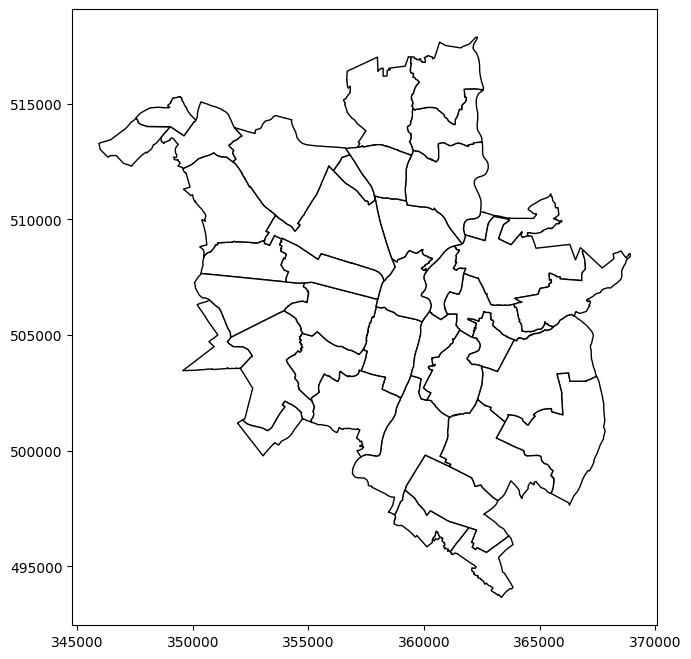

In [ ]:
pzn_df.plot(color = "white", edgecolor = "black")

<Axes: >

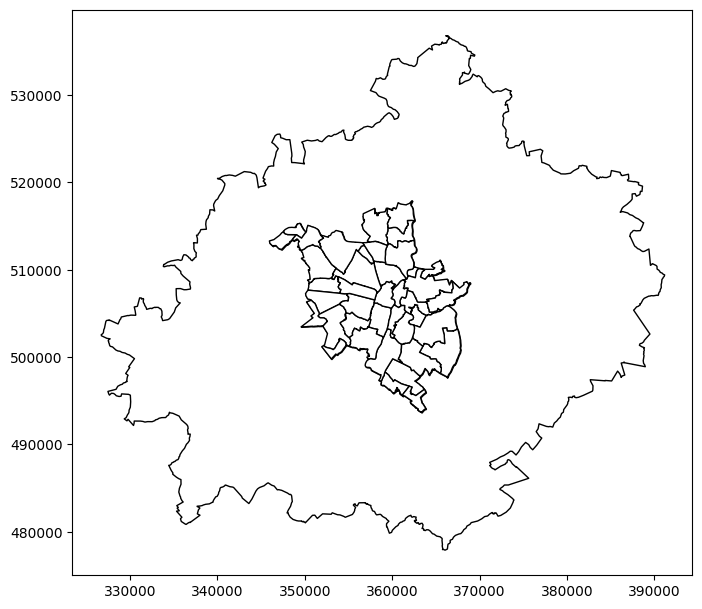

In [ ]:
base = pow_df[pow_df.jpt_kod_je == "3021"].plot(color = "white", edgecolor = "black")
pzn_df.plot(ax=base, color = "white", edgecolor = "black")

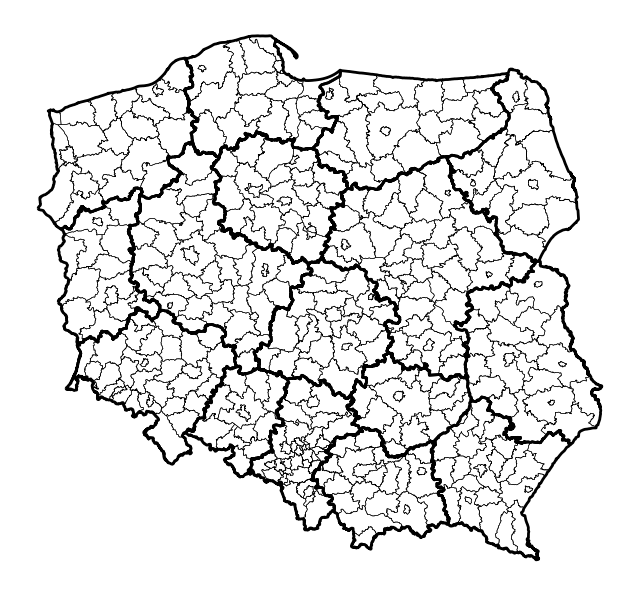

In [ ]:
woj = gpd.read_file("woj.shp", encoding = "utf-8")
woj.set_crs(2180, inplace = True)

pow_base = pow_df.plot(color = "none", edgecolor = "black", linewidth = 0.4)
woj.plot(ax=pow_base, color = "none",  edgecolor = "black", linewidth = 2).set_axis_off()

In [ ]:
wynag = pd.read_excel(io = "powiaty_wynag.xlsx", sheet_name=1)
wynag = wynag[["Kod", "Wartosc"]]

wynag["kod"] = wynag.Kod.astype(str).str.zfill(7) # '201000' => '0201000'

wynag["kod"] = wynag.kod.str.slice(start=0,stop=4)

wynag.head(n=2)

,Kod,Wartosc,kod
0,201000,4214.66,0201
1,202000,4024.94,0202


In [ ]:
pow_df_dane = pd.merge(left = pow_df,
                       right = wynag[["kod", "Wartosc"]],
                       how = "left",
                       left_on = "jpt_kod_je",
                       right_on = "kod")
pow_df_dane.head(n=3)

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry,kod,Wartosc
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37...",0226,4362.98
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37...",0262,4259.37
2,2,0206,powiat jeleniogórski,"POLYGON ((244044.051 332419.671, 244238.860 33...",0206,4035.56


<Axes: >

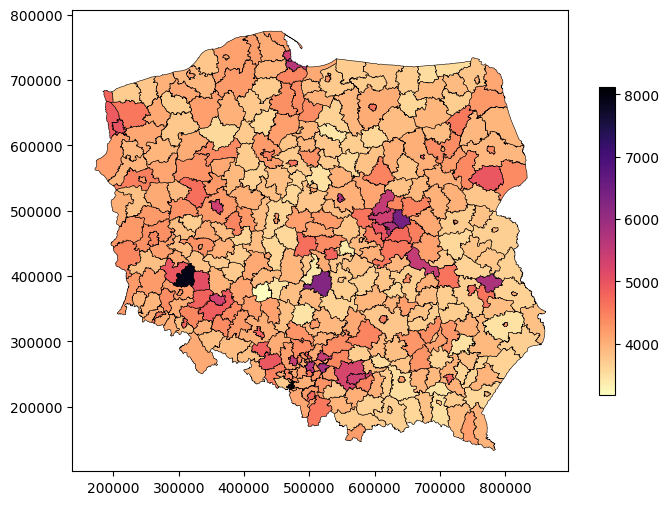

In [ ]:
pow_df_dane.plot(column = "Wartosc", cmap = "magma_r",
                 edgecolor = "black", linewidth = 0.4,
                 legend = True, legend_kwds = {'shrink': 0.5})

Zadanie 1:

- do wykresu powyżej dodać granice województw
- usunąć ramkę ze współrzędnymi

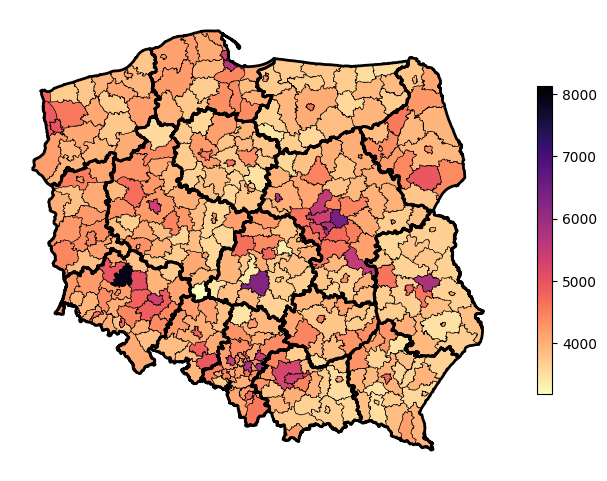

In [ ]:
wynagrodzenia = pow_df_dane.plot(column = "Wartosc", cmap = "magma_r",
                                 edgecolor = "black", linewidth = 0.4,
                                 legend = True, legend_kwds = {'shrink': 0.5})

woj.plot(ax=wynagrodzenia, color = "none",  edgecolor = "black", linewidth = 2).set_axis_off()

Zadanie 2:

- ściągnąć dane o długości żywopłotów w powiatach (najbardziej aktualne)
- nanieść na mapę

In [ ]:
zywoploty = pd.read_excel(io = "zywoploty.xlsx", sheet_name=1)
zywoploty = zywoploty[["Kod", "Wartosc"]]
zywoploty["kod"] = zywoploty.Kod.astype(str).str.zfill(7) # '201000' => '0201000'
zywoploty["kod"] = zywoploty.kod.str.slice(start=0,stop=4)
zywoploty["Wartosc"] = zywoploty["Wartosc"]/1000
zywoploty.head()

,Kod,Wartosc,kod
0,201000,13.484,0201
1,202000,29.979,0202
2,203000,58.114,0203
3,204000,2.372,0204
4,205000,14.676,0205


In [ ]:
pow_df_zywo = pd.merge(left = pow_df,
                       right = zywoploty[["kod", "Wartosc"]],
                       how = "left",
                       left_on = "jpt_kod_je",
                       right_on = "kod")
pow_df_zywo.head(n=3)

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry,kod,Wartosc
0,0,0226,powiat złotoryjski,"POLYGON ((269083.616 370884.075, 269164.192 37...",0226,14.152
1,1,0262,powiat Legnica,"POLYGON ((296226.609 372333.783, 296689.158 37...",0262,160.164
2,2,0206,powiat jeleniogórski,"POLYGON ((244044.051 332419.671, 244238.860 33...",0206,6.462


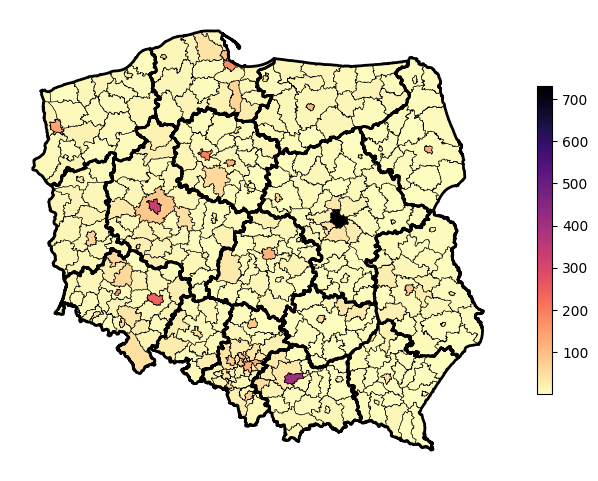

In [ ]:
zywoploty_mapa = pow_df_zywo.plot(column = "Wartosc", cmap = "magma_r",
                                 edgecolor = "black", linewidth = 0.4,
                                 legend = True, legend_kwds = {'shrink': 0.5})

woj.plot(ax=zywoploty_mapa, color = "none",  edgecolor = "black", linewidth = 2).set_axis_off()

# Analizy przestrzenne


## Wyznaczenie wag przestrzennych

In [ ]:
## dostajemy macierz 0-1
W = ps.weights.Queen.from_dataframe(pow_df_dane)
W.transform

<ipython-input-34-34bb01c2281f>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = ps.weights.Queen.from_dataframe(pow_df_dane)


'O'

In [ ]:
## dostajemy się do wyznaczonej macierzy
W.full()[0] ## wyświetlamy całą macierz

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
## wyświetlamy sąsiadów pierwszego obiektu (powiat złotoryjski)
W.full()[0][0,:]

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
W.transform = "r" ## standaryzacja wierszami
W.full()[0][:5,:5]

array([[0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ]])

In [ ]:
## wyświetlamy sąsiadów pierwszego obiektu (powiat złotoryjski)
W.full()[0][0,:]

array([0. , 0. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. ,
       0.2, 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

Wyznaczamy statystykę Morana I z wykorzystaniem modułu `esda`.

In [ ]:
stat_moran = esda.moran.Moran(pow_df_dane.Wartosc, W)
stat_moran.I ## wartość statystyki morana

0.23194481829022168

Interpretacja wyniku jest następująca: Statystyka Morana I jest większa od zera i wynosi 0.23 co oznacza, że autokorelacja przetrzenna wynagrodzeń jest dodatnia. Oznacza to, że powiaty o podobnej sytuacji grupują się.

In [ ]:
stat_moran.seI_norm ## błąd standardowy

0.03412074183220515

Wyznaczamy statystykę Morana I samodzielnie korzystając z następującego wzoru:

$$
I = \frac{\mathbf{z}^T \mathbf{W}^*\mathbf{z} }{\mathbf{z}^T \mathbf{z}}
$$

In [ ]:
## różnica między wartościami obserwowanymi a średnią (y_i - bar{y})
z = pow_df_dane.Wartosc - np.mean(pow_df_dane.Wartosc)
## macierz standaryzowana wierszami
W_star = W.full()[0]
## wyznaczami I zgodnie z powyższym wzorem
I_recznie = (np.transpose(z) @ W_star @ z) / (np.transpose(z) @ z) # %*%
I_recznie

0.23194481829022173

## Lokalne statystyki Morana

In [ ]:
np.random.seed(1)
lokalny_moran = esda.moran.Moran_Local(pow_df_dane.Wartosc, W)
lokalny_moran

In [ ]:
lokalny_moran.Is[:10]

array([-0.04121536,  0.01608459, -0.01296047, -0.58257366,  0.00441351,
        0.01487871, -0.13632716,  0.066761  ,  0.00770085, -0.07764274])

In [ ]:
np.mean(lokalny_moran.Is), np.std(lokalny_moran.Is)

(0.23133443718945804, 0.7269806009398164)

In [ ]:
np.sum(lokalny_moran.p_z_sim < 0.05)

59

<Axes: ylabel='Frequency'>

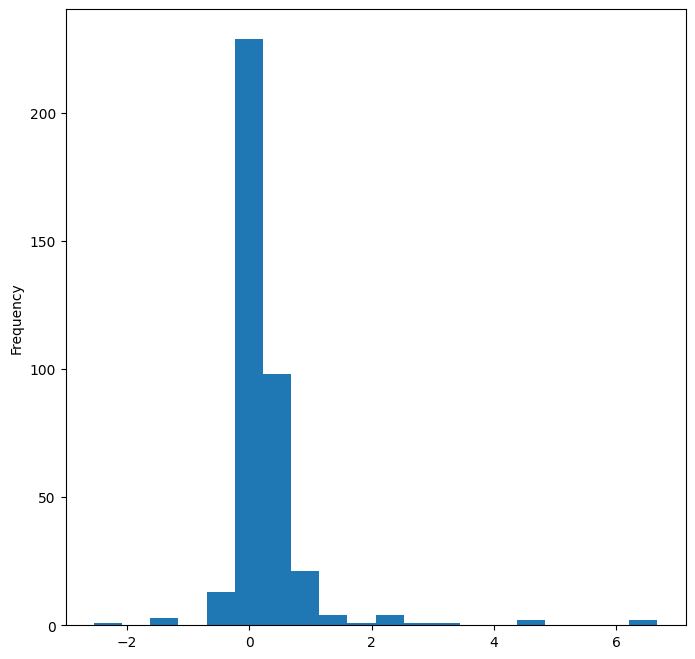

In [ ]:
pow_df_dane["moran2"] = pd.DataFrame(lokalny_moran.Is)
pow_df_dane.moran2.plot.hist(bins = 20)

In [ ]:
pow_df_dane.sort_values(by = "moran2",  ascending=True)

,SP_ID,jpt_kod_je,jpt_nazwa_,geometry,kod,Wartosc,moran2
63,63,1001,powiat bełchatowski,"POLYGON ((489945.770 380441.322, 492229.268 38...",1001,6259.40,-2.541727
86,86,0610,powiat łęczyński,"POLYGON ((754987.929 395734.203, 755092.845 39...",0610,5772.29,-1.590663
271,271,2415,powiat wodzisławski,"POLYGON ((445512.207 243158.664, 445547.467 24...",2415,3725.84,-1.489296
276,276,2467,powiat Jastrzębie-Zdrój,"POLYGON ((465163.252 230038.515, 465227.497 23...",2467,8121.08,-1.280717
165,165,1462,powiat Płock,"POLYGON ((542338.336 517151.085, 542367.493 51...",1462,5705.32,-0.694060
...,...,...,...,...,...,...,...
28,28,0211,powiat lubiński,"POLYGON ((291305.112 387732.614, 291371.123 38...",0211,7915.01,3.336063
163,163,1432,powiat warszawski zachodni,"POLYGON ((589499.227 491374.400, 589712.962 49...",1432,5375.27,4.467491
143,143,1465,powiat Warszawa,"POLYGON ((626505.916 483271.600, 626528.812 48...",1465,6432.78,4.529169
150,150,1421,powiat pruszkowski,"POLYGON ((611505.919 478928.219, 611697.703 47...",1421,5757.06,6.337780


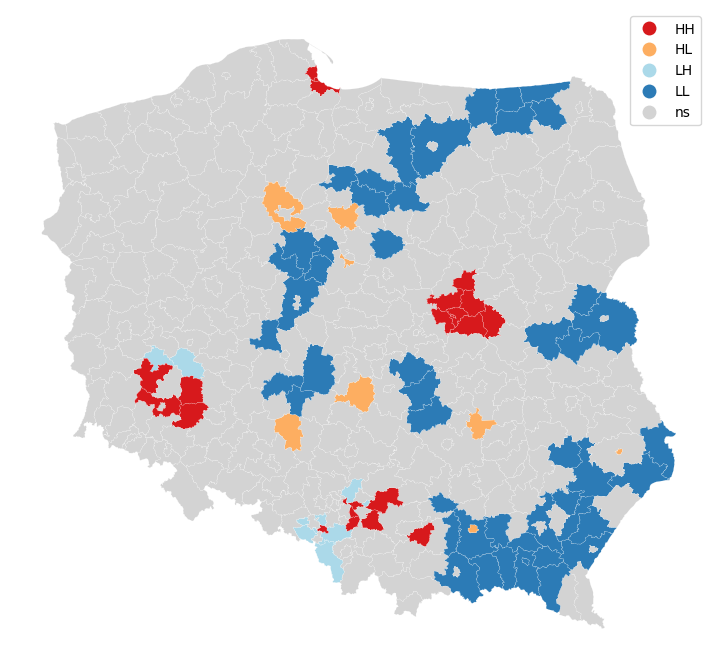

In [ ]:
lisa_cluster(lokalny_moran, pow_df_dane, p = 0.05, figsize = (9,9))
plt.show()

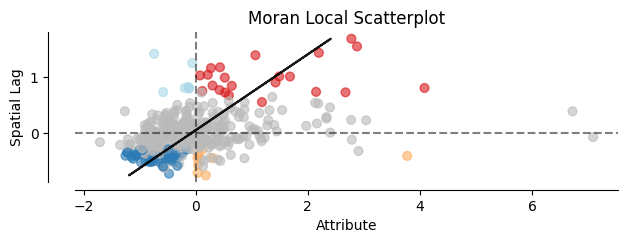

In [ ]:
fig, ax = moran_scatterplot(lokalny_moran, p = 0.05)
plt.show()